Based on a post @ [Towards Data Science](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322).

## Stationarity in time series analysis

"In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time".

- "It does not mean that the series does not change over time, just that the *way* it changes does not itself change over time".

- "The algebraic equivalent is thus a linear function, perhaps, and not a constant one; the value of a linear function changes as $x$ grows, but the way it changes remains constant — it has a constant slope; one value that captures that rate of change".


In [1]:
from IPython.display import Image

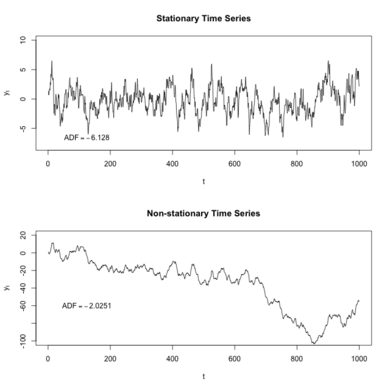

In [8]:
Image('./IMG/stationary-vs-nonstationary.png', width=500)

"Why is this important?"

1. "\[B\]ecause stationary processes are easier to analyze".
    - Without a formal definition for processes generating time series data, it is already clear that stationary processes are a sub-class of a wider family of possible models of reality. This sub-class is much easier to model and investigate. The above informal definition also hints that such processes should be possible to predict, as the way they change is predictable".
    - Although it sounds a bit streetlight effect-ish that simpler theories or models should become more prominent, it is actually quite a common pattern in science, and for good reason".
        - "In many cases simple models can be surprisingly useful, either as building blocks in constructing more elaborate ones, or as helpful approximations to complex phenomena".
        - "As it turns out, this also true for stationary processes".
2. "The final reason, thus, for stationarity’s importance is its ubiquity in time series analysis, making the ability to understand, detect and model it necessary for the application of many prominent tools and procedures in time series analysis".
    - "Indeed, for many cases involving time series, you will find that you have to be able to determine if the data was generated by a stationary process, and possibly to transform it so it has the properties of a sample generated by such a process".

### A formal definition for stochastic processes

**Time series**: "Commonly, a time series $(x_1, x_2, ..., x_e)$ is assumed to be a sequence of real values taken at successive equally spaced points in time, from time $t=1$ to time $t=e$ ".

**Lag**: "For some specific time point $r$, the observation $x_{r-i}$ ($i$ periods back) is called the $i$-th lag of $x_r$ ".
- "A time series $Y$ generated by back-shifting another time series $X$ by $i$ time steps is also sometime called the $i$-th lag of $X$, or an $i$-lag of $X$ ".
- "This transformation is called both the backshifting operator, commonly denoted as $B(\cdot)$, and the lag operator, commonly denoted as $L(\cdot)$; thus, $L(X_r)=X_{r-1}$ ".
- "Powers of the operators are defined as $L^i(X_r)=X_{r-i}$ ".

#### Stochastic processes

"A common approach in the analysis of time series data is to consider the observed time series as part of a *realization* of a *stochastic process*".

**Probability Space**: "A probability space is a triple $(\Omega, F, P)$, where":
1. "$\Omega$ is a nonempty set, called the *sample space*.
2. $F$ is a $\sigma$-algebra of subsets of $\Omega$ i.e. a family of subsets closed with respect to countable union and complement with respect to $\Omega$.
3. $P$ is a probability measure defined for all members of $F$.

**Random Variable**: "A real random variable or real stochastic variable on $(\Omega, F, P)$ is a function $x : \Omega \rightarrow \mathbb R$, such that the inverse image of any interval $(-\infty, a]$ belongs to $F$; i.e. a measurable function".


**Stochastic Process**: "A real stochastic process is a family of real random variables $\boldsymbol X = \{x_i (\omega): i \in T\}$, all defined on the same probability space $(\Omega, F, P)$. The set $T$ is called the index set of the process. If $T \subset \mathbb Z$, then the process is called a discrete stochastic process. If $T$ is an interval of $\mathbb R$, then the process is called a continuous stochastic process".

**Finite Dimensional Distribution**: "For a finite set of integers $T = \{t_1, t_2, ..., t_n\}$, the joint distribution function of $\boldsymbol X = \{X_i(\omega): i \in T\}$ is defined by":

$$
F_{t_1, ..., t_n} \big( x_{t_1}, ..., x_{t_n} \big) = P\big( X_{t_1}(\omega) \leq x_{t_1}, ..., X_{t_n}(\omega) \leq x_{t_n} \big) ,
$$

"which for a stochastic process $\boldsymbol X$ is also commonly denoted as":

$$
F_{X}\big( x_{t_1}, ..., x_{t_n} \big) .
$$

- "The *finite dimensional distribution* of a stochastic process is then defined to be the set of all such joint distribution functions for all such finite integer sets $T$ of any size $n$. For a discrete process it is thus the set":

$$
\bigg\{F_{X} \big( x_{t_1}, ..., x_{t_n} \big) : n \in \mathbb Z^{+}, T \subset \mathbb Z \bigg\} .
$$

***

### Definitions of stationarity

"Intuitively, *stationarity* means that the statistical properties of the process do not change over time. However, several different notions of stationarity have been suggested in econometric literature over the years".

- "An important distinction to make before diving into these definitions is that **stationarity — of any kind — is a property of a stochastic process, and not of any finite or infinite realization of it** (i.e. a time series of values)".

#### Strong stationarity

"Strong stationarity requires the shift-invariance (in time) of the finite-dimensional distributions of a stochastic process".

- "This means that the distribution of a finite sub-sequence of random variables of the stochastic process remains the same as we shift it along the time index axis".
    - "For example, all i.i.d. stochastic processes are stationary".

"Formally, the discrete stochastic process $\boldsymbol X = \{ x_i : i \in \mathbb Z \}$ is stationary if":

$$
F_{X} (x_{t_{1+\tau}}, ..., x_{t_{n+\tau}}) = F_{X} (x_{t_{1}}, ..., x_{t_{n}})
$$

"for $T \subset \mathbb Z$ T⊂ℤ with $n \in \mathbb N$ and any $\tau \in \mathbb Z$ " ([Cox & Miller, 1965](https://www.amazon.com/Theory-Stochastic-Processes-Science-Paperbacks/dp/0412151707)).

- "For continuous stochastic processes the condition is similar, with $T \subset \mathbb R$, $n \in \mathbb N$ and any $\tau \in \mathbb R$ instead".

"This is the most common definition of stationarity, and it is commonly referred to simply as stationarity. It is sometimes also referred to as strict-sense stationarity or strong-sense stationarity".
- "**Note**: This definition does not assume the *existence/finiteness* of any [moment](https://www.statlect.com/fundamentals-of-probability/moments) of the random variables composing the stochastic process!"

#### Weak stationarity

"Weak stationarity only requires the shift-invariance (in time) of the first moment and the cross moment (the auto-covariance)".

- "This means the process has the same mean at all time points, and that the covariance between the values at any two time points, $t$ and $t−k$, depend only on $k$, the difference between the two times, and not on the location of the points along the time axis".

"Formally, the process $\{x_i : i \in \mathbb Z\}$ is weakly stationary if":

1. "The first moment of $x_i$ is constant, i. e. $\forall\ t, E[x_i] = \mu$".
2. "The second moment of $x_i$ is finite for all $t$, i. e. $\forall\ t, E[x_i^2] < \infty$ (which also implies of course $E[(x_i - \mu)^2] < \infty$, i. e., that variance is finite for all $t$)".
3. "The cross moment (or [auto-covariance](https://en.wikipedia.org/wiki/Autocovariance)) depends only on the difference $u-v$, i. e., $\forall\ u,v,a,\ \text{Cov}(x_u, x_v) = \text{Cov}(x_{u+a}, x_{v+a})$".

    - "The third condition implies that every lag $\tau \in \mathbb N$ has a constant covariance value associated with it":
$$
\text{Cov}(X_{t_1}, X_{t_2}) = K_{XX}(t_1, t_2) = K_{XX}(t_2 - t_1, 0) = K_{XX}(\tau) .
$$

    - "Note that this directly implies that the variance of the process is also constant, since we get that for all $t \in \mathbb N$":
$$
\text{Var}(X_t) = \text{Cov}(X_t, X_t) = K_{XX}(t,t) = K_{XX}(0) = d .
$$

"Other common names for weak stationarity are *wide-sense stationarity*, *weak-sense stationarity*, *covariance stationarity* and *second order stationarity*".

"This paints a specific picture of weakly stationary processes as those with constant mean and variance. Their properties are contrasted nicely with those of their counterparts in figure below":

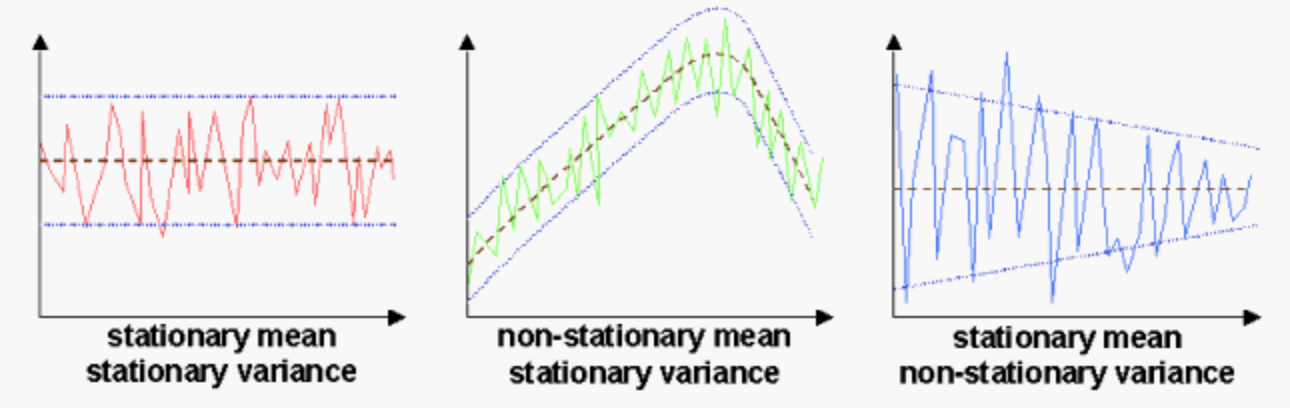

In [3]:
Image('./IMG/constant-mean-variance.png')

"**Note**: Strong stationarity does not imply weak stationarity, nor does the latter implies the former (see example [here](https://stats.stackexchange.com/questions/282635/why-is-weak-stationarity-equivalent-to-strict-stationarity-only-when-distributio))!"

- "An exception are Gaussian processes, for which weak stationarity does imply strong stationarity".

- "The reason strong stationarity does not imply weak stationarity is that it does not mean the process necessarily has a finite second moment; e.g. an IID process with standard Cauchy distribution is strictly stationary but has no finite second moment (see [Myers, 1989](https://link.springer.com/article/10.1007/BF00893695))".
    - "Indeed, having a finite second moment is a necessary and sufficient condition for the weak stationarity of a strongly stationary process".

#### White Noise Process

"A white noise process is a serially uncorrelated stochastic process with a mean of zero and a constant and finite variance".

"Formally, the process $\{x_i : i \in \mathbb Z \}$ is a white noise process if":

1. "The first moment of $x_i$ is always zero, i. e., $\forall\ t, E[x_i] = 0$ ".
2. "The second moment of $x_i$ is finite for all $t$, i. e., $\forall\ t, E[(x_i - \mu)^2] < \infty$ ".
3. "The cross moment $E[x_u x_v]$ is zero when $u \neq v$, i. e., $\forall\ u, v, w$ ".
    - "$u \neq v : \text{Cov}(x_u, x_v) = 0$ ".

- "Note that this implies that every white noise process is a weak stationary process. If, additionally, every variable xᵢ follows a normal distribution with zero mean and the same variance σ², then the process is said to be a Gaussian white noise process".

#### $N$-th order stationarity

"Very close to the definition of strong stationarity, $N$-th order stationarity demands the shift-invariance (in time) of the distribution of any $n$ samples of the stochastic process, for all $n$ up to order $N$ ".

- "Thus, the same condition is required":
$$
F_{X}(x_{t_{1+\tau}}, ..., x_{t_{n+\tau}}) = F_{X}(x_{t_{1}}, ..., x_{t_{n}}),
$$
"for $T \subset \mathbb Z$ with $n \in \{ 1, ..., N \}$ and any $\tau \in \mathbb Z$ ".

- "Naturally, stationarity to a certain order N does not imply stationarity of any higher order (but the inverse is true)". More [here](https://mathoverflow.net/questions/42141/a-stochastic-process-that-is-1st-and-2nd-order-strictly-stationary-but-not-3r).

#### Cyclostationarity

"A stochastic process is cyclostationary if the joint distribution of any set of samples is invariant over a time shift of $mP$, where $m \in \mathbb Z$ and $P \in \mathbb N$ is the period of the process":

$$
F_{X}(x_{t_{1+mP}}, ..., x_{t_{n+mP}}) = F_{X}(x_{t_{1}}, ..., x_{t_{n}})
$$

"Cyclostationarity is prominent in signal processing".


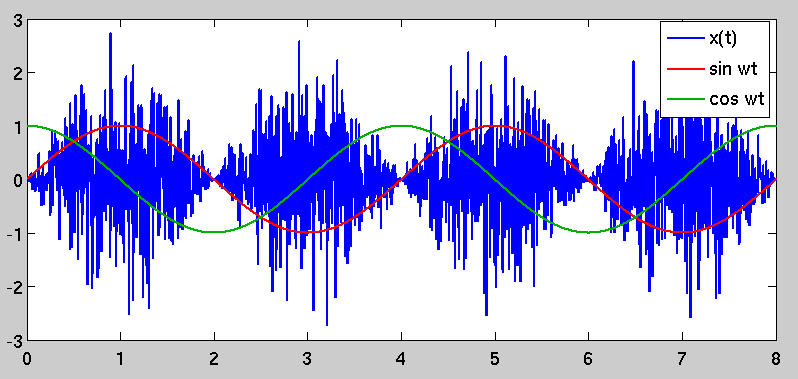

In [4]:
Image('./IMG/cyclostationarity.png')

#### Trend stationarity

"A stochastic process is trend stationary if an underlying trend (function solely of time) can be removed, leaving a stationary process".
- "Meaning, the process can be expressed as $y_i = f(i) + \varepsilon_i$, where $f(i)$ is any function $f: \mathbb R \rightarrow \mathbb R$ and $\varepsilon_i$ is a stationary stochastic process with a mean of zero".

"In the presence of a shock (a significant and rapid one-off change to the value of the series), trend-stationary processes are mean-reverting; i.e. over time, the series will converge again towards the growing (or shrinking) mean, which is not affected by the shock":


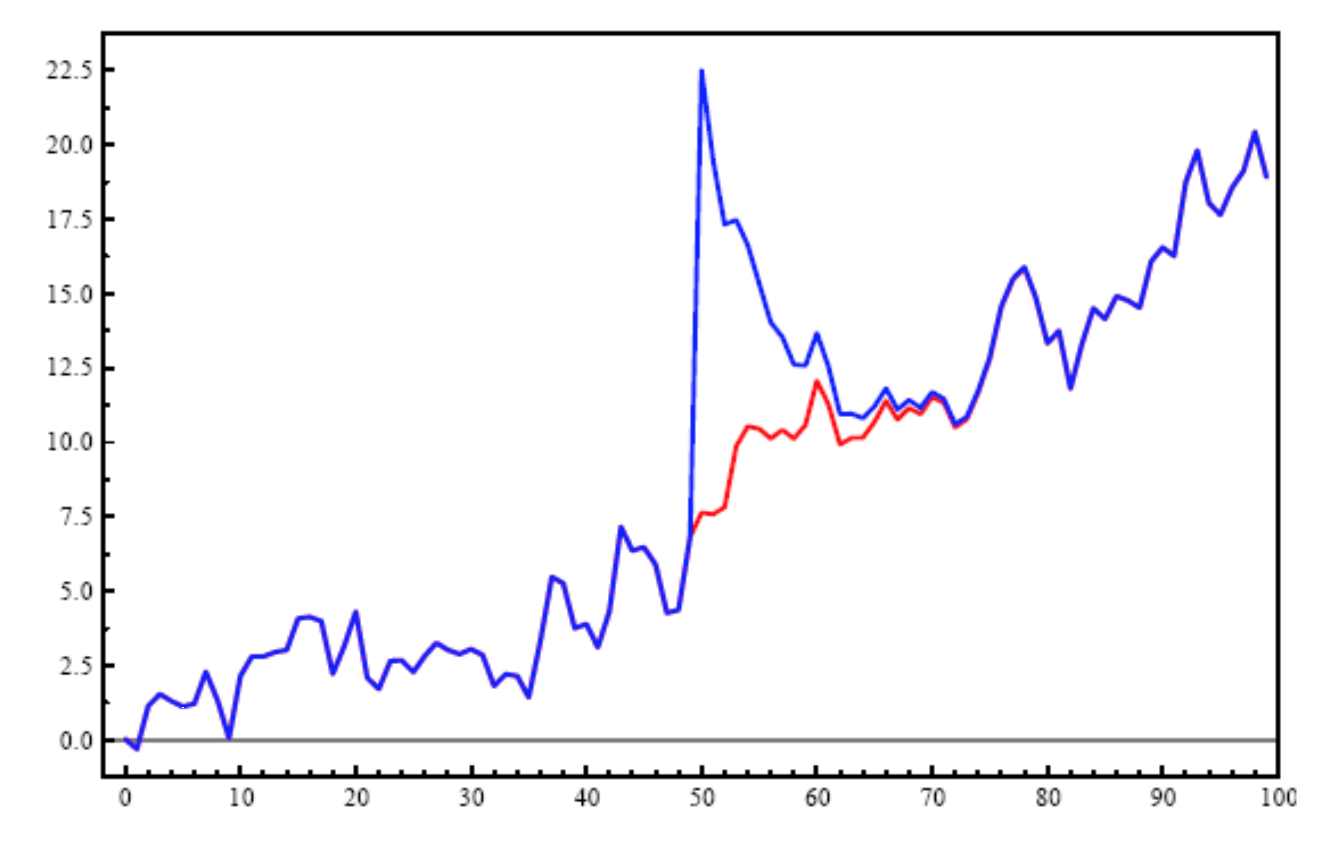

In [5]:
Image('./IMG/trend-stationary.png')

#### Joint stationarity

"Intuitive extensions exist of all of the above types of stationarity for pairs of stochastic processes".
- "For example, for a pair of stochastic process $\boldsymbol X$ and $\boldsymbol Y$, joint strong stationarity is defined by the same condition of strong stationarity, but is simply imposed on the joint cumulative distribution function of the two processes".
- "Weak stationarity and $N$-th order stationarity can be extended in the same way (the latter to $M$-$N$-th order joint stationarity).

#### Locally stationary stochastic processes

"One intuitive definition for LS processes, given in [Cardinali & Nason, 2010](https://onlinelibrary.wiley.com/doi/full/10.1002/sta4.125), is that their statistical properties change slowly over time".

"Alternatively, [Dahlhaus, 2012](https://arxiv.org/abs/1109.4174) defines them (informally) as processes which locally at each time point are close to a stationary process but whose characteristics (covariances, parameters, etc.) are gradually changing in an unspecific way as time evolves".

"A formal definition can be found in [Vogt, 2012](https://arxiv.org/pdf/1302.4198.pdf), and [Dahlhaus, 2012](https://arxiv.org/abs/1109.4174) provides a rigorous review of the subject".

#### The typology of notions of stationarity


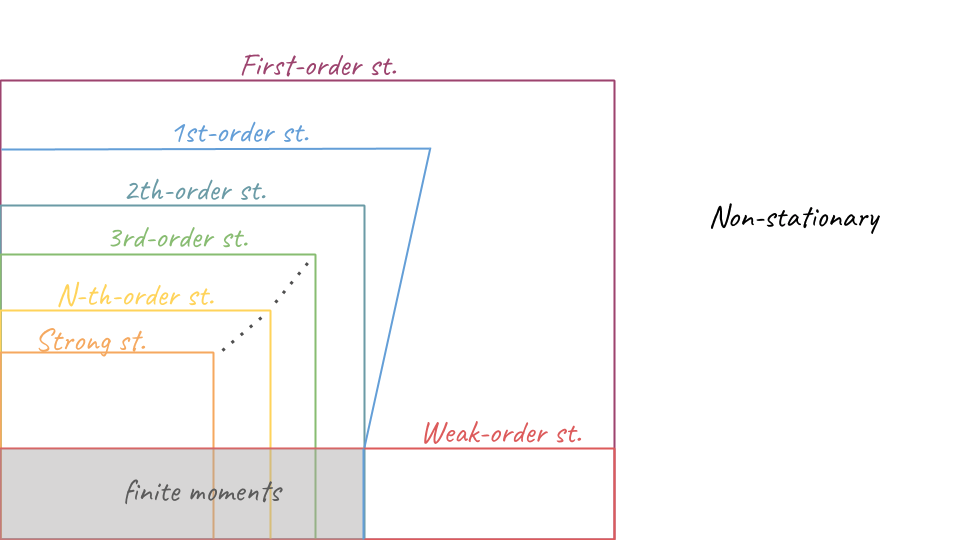

In [6]:
Image('./IMG/topology.png')

***

#### Parametric notions of non-stationarity

"The definitions of stationarity presented so far have been non-parametric; i.e., they did not assume a model for the data-generating process, and thus apply to any stochastic process".
- "The related concept of a difference stationarity and unit root processes, however, requires a brief introduction to stochastic process modeling".
- "The topic of stochastic modeling is also relevant insofar as various simple models can be used to create stochastic processes":

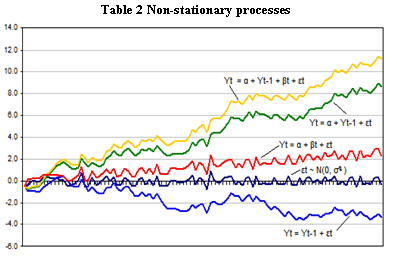

In [7]:
Image('./IMG/nonstationary-processes.gif', width=600)

### Basic concepts in stochastic process modeling

"The forecasting of future values is a common task in the study of time series data. To make forecasts, some assumptions need to be made regarding the Data Generating Process (DGP), the mechanism generating the data. These assumptions often take the form of an explicit model of the process, and are also often used when modeling stochastic processes for other tasks, such as anomaly detection or causal inference. We will go over the three most common such models".

#### The [autoregressive](https://en.wikipedia.org/wiki/Autoregressive_model) (AR) model

"A time series modeled using an AR model is assumed to be generated as a linear function of its past values, plus a random noise/error":
$$
x_t = c + \phi_{1} x_{t-1} + ... + \phi_{p} x_{t-p} + \varepsilon_t .
$$

- "This is a memory-based model, in the sense that each value is correlated with the $p$ preceding values".
    - "An AR model with lag $p$ is denoted with AR($p$)".
- "The coefficients $\phi_i$ are weights measuring the influence of these preceding values on the value $x[t]$, $c$ is constant intercept and $\varepsilon_i$ is a univariate white noise process (commonly assumed to be Gaussian)".

- "The [vector autoregressive](https://en.wikipedia.org/wiki/Vector_autoregression) (VAR) model generalizes the univariate case of the AR model to the multivariate case; now each element of the vector $x[t]$ of length $k$ can be modeled as a linear function of all the elements of the past $p$ vectors":
$$
\mathbf{x}_t = \mathbf{c} + \mathbf{A}_1 \mathbf{x}_{t-1} + ... + \mathbf{A}_p \mathbf{x}_{t-p} + \mathbf{e}_t
$$
"where $\mathbf c$ is a vector of $k$ constants (the intercepts), $\mathbf A_i$ are time-invariant $k \times k$ matrices and $\mathbf e = \{\mathbf e_i : i \in \mathbb Z\}$ is a *white noise multivariate process* of $k$ variables".

#### The [moving average](https://en.wikipedia.org/wiki/Moving-average_model) (MA) model

"A time series modeled using a moving average model, denoted with MA($q$), is assumed to be generated as a linear function of the last $q+1$ random shocks generated by $\varepsilon_i$, a *univariate white noise process*":
$$
x_t = \varepsilon_t + \theta_1 \varepsilon_{t-1} + ... + \theta_q \varepsilon_{t-q}
$$

- "Like for autoregressive models, a vector generalization, VMA, exists".

#### The [autoregressive moving average](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model) (ARMA) model

"A time series modeled using an ARMA($p,q$) model is assumed to be generated as a linear function of the last $p$ values and the last $q+1$ random shocks generated by $\varepsilon_i$, a *univariate white noise process*":
$$
x_t = \phi_1 x_{t-1} + ... + \phi_p x_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + ... + \theta_q \varepsilon_{t-q}.
$$

"The ARMA model can be generalized in a variety of ways, for example to deal with non-linearity or with exogenous variables, to the multivariate case ([VARMA](https://documentation.sas.com/?docsetId=etsug&docsetTarget=etsug_ssm_details33.htm&docsetVersion=14.2&locale=en)) or to deal with (a specific type of) non-stationary data ([ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average))".

***

### Difference stationary processes

"This concept relies on the assumption that the stochastic process in question can be written as an autoregressive process of order $p$, denoted as AR($p$)":
$$
y_t = a_0 + a_1 y_{t-1} + ... + a_p y_{t-p} + \varepsilon_t
$$
"where $\varepsilon_i$ are usually uncorrelated white-noise processes (for all times $t$)".

- "We can write the same process as":
$$
(1 - a_1 L - ... - a_p L^p) y_t = a_0 + \varepsilon_t
$$
    - "The part inside the parenthesis on the left is called the [characteristic equation](https://en.wikipedia.org/wiki/Characteristic_equation_(calculus)) of the process".
    - "We can consider the roots of this equation":
    $$
    m^p - m^{p-1} a_1 - ... - a_p = 0
    $$

    - "If $m=1$ is a root of the equation then the stochastic process is said to be a *difference stationary process*, or *integrated*".
        - "This means that the process can be transformed into a weakly-stationary process by applying a certain type of transformation to it, called [differencing](https://en.wikipedia.org/wiki/Finite_difference)".
        - Below, "a time series (left) and a the series after differencing (right)".
    - "Difference stationary processes have an [order of integration](https://en.wikipedia.org/wiki/Order_of_integration), which is the number of times the differencing operator must be applied to it in order to achieve weak stationarity".
        - "A process that has to be differenced $r$ times is said to be integrated of order $r$, denoted by $I(r)$".
        - "This coincides exactly with the [multiplicity of the root](https://en.wikipedia.org/wiki/Multiplicity_(mathematics)#Multiplicity_of_a_root_of_a_polynomial) $m=1$; meaning, if $m=1$ is a root of multiplicity $r$ of the characteristic equation, then the process is integrated of order $r$".

#### Unit root process

"A common sub-type of difference stationary process are processes integrated of order 1, also called unit root process. The simplest example for such a process is the following autoregressive model":
$$
y_t = y_{t-1} + \varepsilon_t
$$

"Unit root processes, and difference stationary processes generally, are interesting because they are non-stationary processes that can be easily transformed into weakly stationary processes".
- "As a result, while the term is not used interchangeably with non-stationarity, the questions regarding them sometimes are".

"As sometime tests and procedures to check whether a process has a unit root (a common example is the Dickey-Fuller test) are mistakenly thought of as procedures for testing non-stationarity".
- "It is thus important to remember that these are distinct notions, and that <u>while every process with a unit root is non-stationary, and so is every processes integrated to an order $r>1$, the opposite is far from true</u>".

#### Semi-parametric unit root processes

"Another definition of interest is a wider, and less parametric, sub-class of non-stationary processes, which can be referred to as semi-parametric unit root processes".
- "The definition was introduced in [Davidson, 2002](https://www.sciencedirect.com/science/article/abs/pii/S0304407601001002), but a concise overview of it can be found [Breitung, 2002](https://www.sciencedirect.com/science/article/abs/pii/S0304407601001397)".